In [1]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [2]:
# !cp /content/gdrive/MyDrive/social-dist/pedestrians.mp4 /content/

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "./data/videos/pedestrians.mp4"

In [5]:
import matplotlib.pyplot as plt

def imShow(img):
    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    height, width = img.shape[:2]
    resized_image = cv2.resize(img,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

def filImShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

In [6]:
cap = cv2.VideoCapture(path)
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frames = []

frameIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=5)
codec = cap.get(cv2.CAP_PROP_FOURCC)
for fid in frameIds:
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = cap.read()
    frames.append(frame)

cap.release()
print(ret)
print(frames[1].shape)
print(codec)

531.0
True
(1080, 1920, 3)
828601953.0


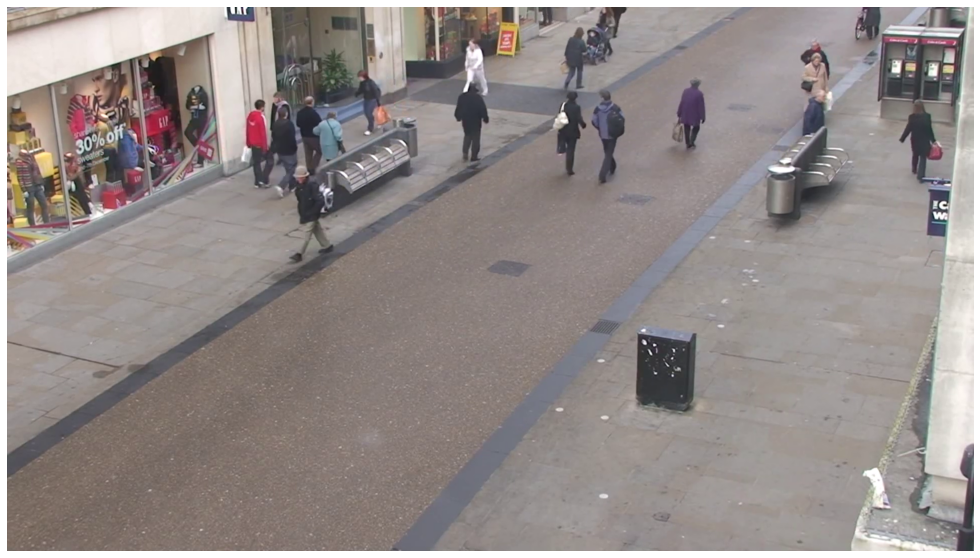

True

In [8]:
imShow(frame)
cv2.imwrite("first_frame.jpg", frame)

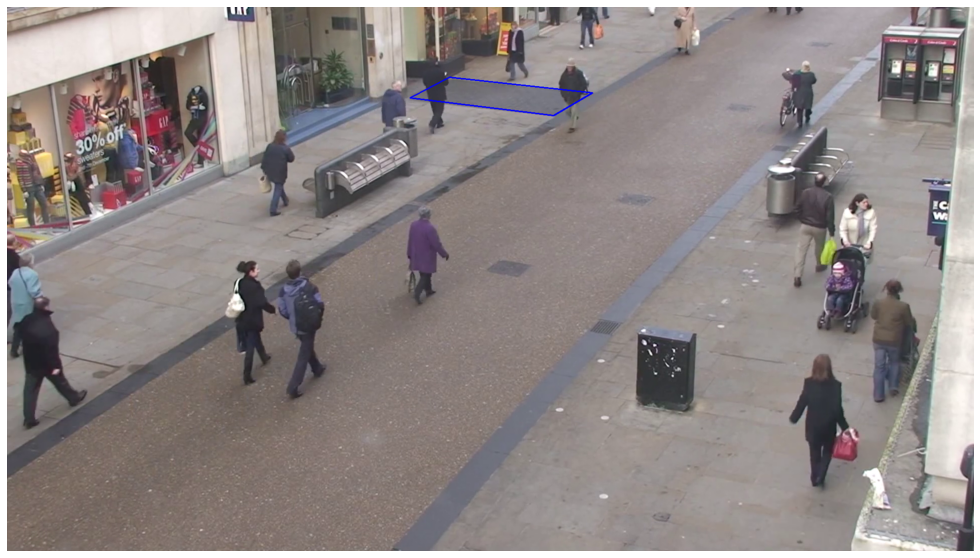

In [6]:
isClosed = True
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
pts = np.array([[878, 139], [1162, 170], [1085, 215], [800, 180]], np.int32)
# pts = np.array([[500,520], [540,540], [210,210], [110,110]], np.int32)

lined = cv2.polylines(frame,[pts], 
                  isClosed, color, thickness)
imShow(lined)

In [7]:
def getWarpingMatrix(forward = True):
    pts1 = np.float32([[878, 139], [1162, 170], [800, 180], [1085, 215]])
    pts2 = np.float32([[1000, 400], [1200, 400], [1000, 480], [1200, 480]])
    if forward:
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
    else:
        matrix = cv2.getPerspectiveTransform(pts2, pts1)
    return matrix

def WarpPerspective(image, matrix, forward = True):
    if forward:
        out_shape = (2000, 1500)
    else:
        out_shape = (1920, 1080)
    result = cv2.warpPerspective(image, matrix, out_shape, flags = cv2.INTER_LINEAR)
    # result = cv2.warpPerspective(image, matrix, (image.shape[1], image.shape[0]), flags = cv2.INTER_LINEAR)
    return result

### Cloning Darknet YOLOV4 along with weigths

In [20]:
# %cd pytorch-YOLOv4
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
%cd ..

D:\Prog\dev\Social_Distancing


In [ ]:
%cd data
!wget https://github.com/AlexeyAB/darknet/raw/master/data/person.jpg 
%cd ..

/content/pytorch-YOLOv4/data
--2021-07-12 04:09:36--  https://github.com/AlexeyAB/darknet/raw/master/data/person.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AlexeyAB/darknet/master/data/person.jpg [following]
--2021-07-12 04:09:37--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/data/person.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113880 (111K) [image/jpeg]
Saving to: ‘person.jpg’

person.jpg          100%[===================>] 111.21K  --.-KB/s    in 0.02s   

2021-07-12 04:09:37 (6.89 MB/s) - ‘person.jpg’ saved [113880/113880]

/content/pytorch-YOLOv4


In [ ]:
%cd /content/pytorch-YOLOv4
!python demo.py -cfgfile cfg/yolov4.cfg -weightfile yolov4.weights -imgfile /content/pedes.jpg

In [ ]:
predPed = cv2.imread("/content/pytorch-YOLOv4/predictions.jpg")
imShow(predPed)

#### Code for Detecting people in image

In [ ]:
%cd /content/pytorch-YOLOv4

/content/pytorch-YOLOv4


In [ ]:
from tool.utils import *
from tool.torch_utils import *
from tool.darknet2pytorch import Darknetrknet

In [ ]:
# m.print_network()
cfgfile = "./cfg/yolov4.cfg"
weightfile = "./yolov4.weights"
# imgfile = "/content/pedes.jpg"
use_cuda = False

In [ ]:
m = Darknet(cfgfile)

m.load_weights(weightfile)
print('Loading weights from %s... Done!' % (weightfile))


convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
Loading weights from ./yolov4.weights... Done!


In [ ]:
num_classes = m.num_classes
if num_classes == 20:
    namesfile = 'data/voc.names'
elif num_classes == 80:
    namesfile = 'data/coco.names'
else:
    namesfile = 'data/x.names'
class_names = load_class_names(namesfile)

# img = cv2.imread(imgfile)
img = frame
sized = cv2.resize(img, (m.width, m.height))
sized = cv2.cvtColor(sized, cv2.COLOR_BGR2RGB)

start = time.time()
boxes = do_detect(m, sized, 0.4, 0.6, use_cuda)
finish = time.time()
print('Predicted in %f seconds.' % ((finish - start)))
bbs = plot_boxes_cv2(img, boxes[0], savename='predictions.jpg', class_names=class_names);

-----------------------------------
           Preprocess : 0.002011
      Model Inference : 2.351309
-----------------------------------
-----------------------------------
       max and argmax : 0.006455
                  nms : 0.001525
Post processing total : 0.007980
-----------------------------------
Predicted in 2.824694 seconds.
person: 0.986016
person: 0.982694
person: 0.973350
person: 0.965639
person: 0.965023
person: 0.962938
person: 0.918660
person: 0.917541
person: 0.912630
person: 0.882733
person: 0.659916
person: 0.620504
person: 0.482006
person: 0.435019
save plot results to predictions.jpg


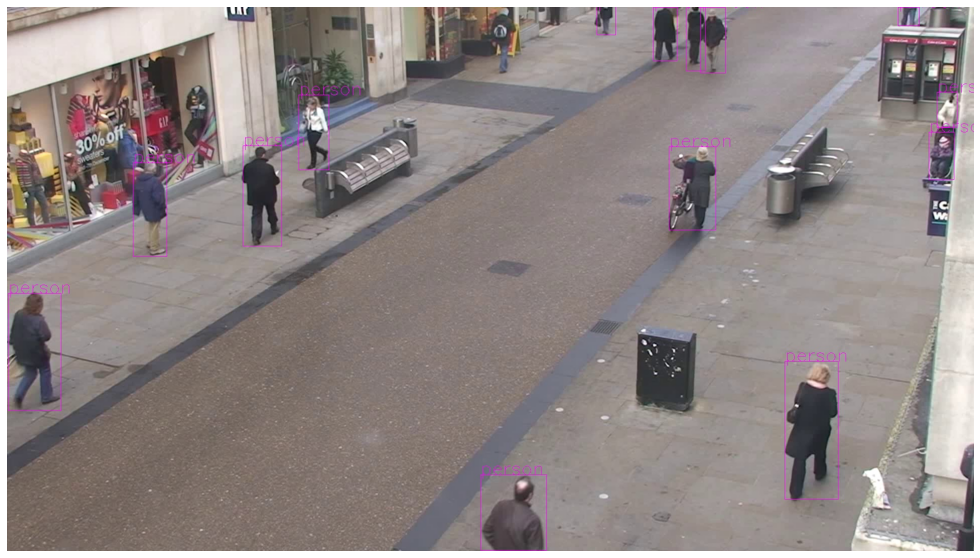

In [ ]:
filImShow("/content/pytorch-YOLOv4/predictions.jpg")

In [ ]:
bbs = np.array(bbs)
bbs_center = np.zeros((len(bbs),2), np.int32)
bbs_center[:,0] = (bbs[:,0] + bbs[:,2]) // 2
bbs_center[:,1] = (bbs[:,3])
bbs_center

array([[1597,  977],
       [ 506,  474],
       [ 283,  495],
       [  54,  801],
       [1401,  131],
       [1306,  106],
       [ 609,  323],
       [1360,  442],
       [1005, 1078],
       [1367,  126],
       [1189,   55],
       [1855,  342],
       [1866,  239],
       [1790,   37]], dtype=int32)

In [ ]:
def getTransformedPoint(p, matrix = getWarpingMatrix()):
  px = (matrix[0][0]*p[0] + matrix[0][1]*p[1] + matrix[0][2]) / ((matrix[2][0]*p[0] + matrix[2][1]*p[1] + matrix[2][2]))
  py = (matrix[1][0]*p[0] + matrix[1][1]*p[1] + matrix[1][2]) / ((matrix[2][0]*p[0] + matrix[2][1]*p[1] + matrix[2][2]))
  p_after = (int(px), int(py)) 
  return p_after

In [ ]:
getWarpingMatrix()

array([[ 1.10444226e+00,  2.88479687e+00,  9.81821589e+00],
       [-1.54048527e-01,  2.77675907e+00,  3.01487211e+02],
       [ 2.37716106e-04,  1.23590320e-03,  1.00000000e+00]])

In [ ]:
image = cv2.circle(frame.copy(), tuple(bbs_center[7]), 255, (255,255,255), 5)
imShow(image)

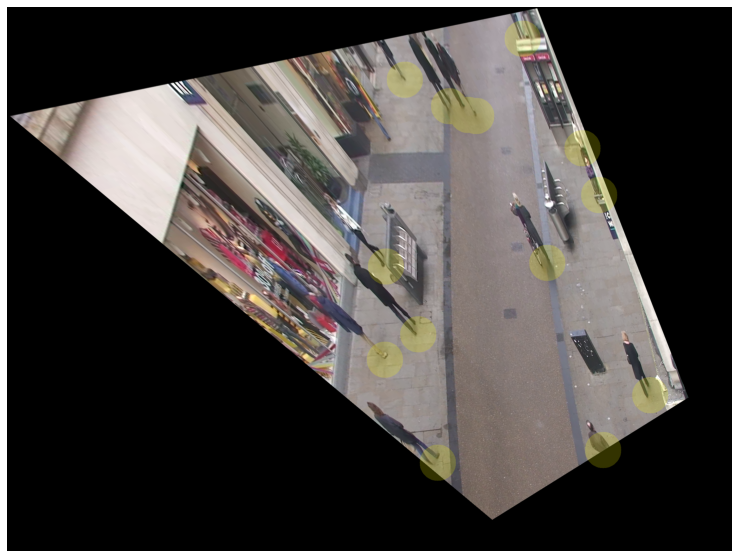

In [ ]:
mat =  getWarpingMatrix()
image = WarpPerspective(frame.copy(), mat)
overlay = image.copy()
for pt in bbs_center:
  image = cv2.circle(image, getTransformedPoint(pt, mat), 50, (0,255,255), -1)

alpha = 0.8  # Transparency factor.
image = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)

imShow(image)

In [ ]:
birdsEyesCenters = np.array(list(map(getTransformedPoint, bbs_center)))
pairWiseDist = np.int32(np.linalg.norm(birdsEyesCenters[:, None, :] - birdsEyesCenters[None, :, :], axis=-1))
pairWiseDist[pairWiseDist > 100] = 0

-----------------------------------
           Preprocess : 0.002043
      Model Inference : 2.450511
-----------------------------------
-----------------------------------
       max and argmax : 0.004788
                  nms : 0.001773
Post processing total : 0.006562
-----------------------------------
person: 0.986359
person: 0.975437
person: 0.962275
person: 0.955630
person: 0.920819
person: 0.918638
person: 0.910962
person: 0.907108
person: 0.894209
person: 0.889728
person: 0.811844
person: 0.810908
person: 0.751404
person: 0.749325
person: 0.717094
person: 0.636284
person: 0.567981
person: 0.476059
person: 0.418257


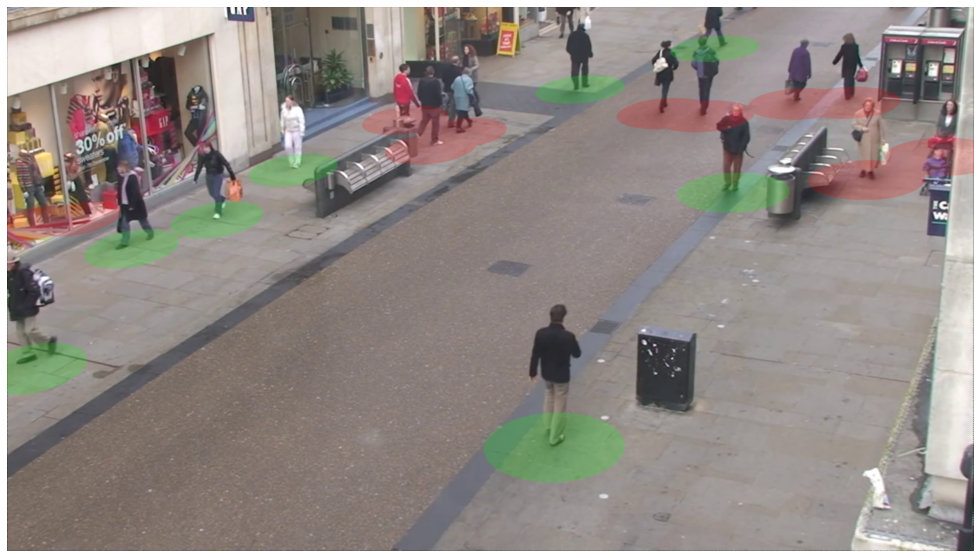

In [ ]:
def getPaiWiseDistance(points):
  return np.int32(
      np.linalg.norm(
          points[:, None, :] - points[None, :, :], axis=-1
          )
      )
  
def social_distance_monitor(frame, model=m, class_names = class_names):
  
  # model detects people in normal frame
  img = frame
  sized = cv2.resize(img, (m.width, m.height))
  sized = cv2.cvtColor(sized, cv2.COLOR_BGR2RGB)

  boxes = do_detect(model, sized, 0.4, 0.6, False)
  bbs = plot_boxes_cv2(frame, boxes[0], class_names=class_names);
  bbs = np.array(bbs)
  
  # Calculating bounding box distances and the center of the bottom edge
  bbs_center = np.zeros((len(bbs),2), np.int32)
  bbs_center[:,0] = (bbs[:,0] + bbs[:,2]) // 2
  bbs_center[:,1] = (bbs[:,3])

  # Matrix for frame transform 
  mat =  getWarpingMatrix()
  frame = WarpPerspective(frame.copy(), mat)
  
  # Transforming the center points to bird's eye coordinate
  birdsEyesCenters = np.array(list(map(getTransformedPoint, bbs_center)))
  pairWiseDist = getPaiWiseDistance(birdsEyesCenters)
  pairWiseDist[pairWiseDist > 100] = 0

  overlay = frame.copy()
  for i in range(len(pairWiseDist)):
    if pairWiseDist[i].any():
      frame = cv2.circle(frame, getTransformedPoint(bbs_center[i], mat), 50, (0,0,255), -1)
    else:
      frame = cv2.circle(frame, getTransformedPoint(bbs_center[i], mat), 50, (0,255,0), -1)
  
  alpha = 0.8  # Transparency factor.
  frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

  mat_inv =  getWarpingMatrix(False)
  frame = WarpPerspective(frame, mat_inv, forward = False)
  
  return frame

image = social_distance_monitor(frames[3])
imShow(image)

In [ ]:
p = getTransformedPoint(bbs_center[7], mat)

In [ ]:
print(p)

None


In [ ]:
pairWiseDist = np.int32(np.linalg.norm(birdsEyesCenters[:, None, :] - birdsEyesCenters[None, :, :], axis=-1))
pairWiseDist

array([[   0,  661,  738,  614,  907,  971,  810,  462,  199,  922, 1102,
         569,  706, 1044],
       [ 661,    0,  115,  358,  622,  634,  207,  406,  601,  620,  702,
         629,  684,  864],
       [ 738,  115,    0,  319,  717,  721,  257,  521,  651,  712,  773,
         745,  798,  963],
       [ 614,  358,  319,    0,  961,  983,  559,  628,  457,  962, 1059,
         861,  954, 1192],
       [ 907,  622,  717,  961,    0,   79,  483,  449,  985,   23,  220,
         403,  306,  248],
       [ 971,  634,  721,  983,   79,    0,  475,  509, 1038,   57,  142,
         481,  385,  275],
       [ 810,  207,  257,  559,  483,  475,    0,  445,  784,  475,  517,
         620,  632,  732],
       [ 462,  406,  521,  628,  449,  509,  445,    0,  538,  463,  639,
         235,  330,  621],
       [ 199,  601,  651,  457,  985, 1038,  784,  538,    0,  996, 1158,
         703,  833, 1155],
       [ 922,  620,  712,  962,   23,   57,  475,  463,  996,    0,  199,
         424,  32

In [ ]:
pairWiseDist[pairWiseDist > 100] = 0
np.argwhere(pairWiseDist > 0)

array([[4, 5],
       [4, 9],
       [5, 4],
       [5, 9],
       [9, 4],
       [9, 5]])

True

#### Testing On the full Video

In [ ]:
cap = cv2.VideoCapture("/content/pedestrians.mp4")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

writer = cv2.VideoWriter('/content/output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

if not cap.isOpened():
  print("SKADOSH ERROR!!!!!!!!!!!!")
interCount = 0
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret:
    result = social_distance_monitor(frame)
    writer.write(result)
  else:
    break
  interCount += 1
cap.release()
writer.release()

In [ ]:
from google.colab import files
files.download('/content/output.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/output.avi /content/gdrive/MyDrive/social-dist/

In [ ]:
cap = cv2.VideoCapture("/content/output.avi")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

writer = cv2.VideoWriter('/content/output2.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 60, (frame_width,frame_height))

if not cap.isOpened():
  print("SKADOSH ERROR!!!!!!!!!!!!")
interCount = 0
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret:
    writer.write(frame)
  else:
    break
  print(interCount)
  interCount += 1
cap.release()
writer.release()

In [ ]:
!cp /content/output2.avi /content/gdrive/MyDrive/social-dist/

In [ ]:
cv2.VideoWriter_fourcc('M','J','P','G')

1196444237

In [ ]:
%cd /content/
cap = cv2.VideoCapture(path)

codec = int(cap.get(cv2.CAP_PROP_FOURCC))

cap.release()
print(codec)
# cv2.imwrite("pedes.jpg", frame)

/content
828601953.0


In [ ]:
cap = cv2.VideoCapture("/content/output2.avi")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

writer = cv2.VideoWriter('/content/output3.avi', int(cap.get(cv2.CAP_PROP_FOURCC)), 60, (frame_width,frame_height))

if not cap.isOpened():
  print("SKADOSH ERROR!!!!!!!!!!!!")
interCount = 0
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret:
    writer.write(frame)
  else:
    break
  print(interCount)
  interCount += 1
cap.release()
writer.release()